In [12]:
import numpy as np

# 読み込み
data = np.load("processed/MoNA_features.npz")

# カラム一覧
for key in data.files:
    print(f"{key}, Shape: {data[key].shape}")

# has_Fが1のサンプル数
has_F = data['has_F']
num_has_F = np.sum(has_F == 1)
print(f"Number of samples with has_F=1: {num_has_F}")


entry_id, Shape: (9584,)
smiles, Shape: (9584,)
inchikey, Shape: (9584,)
atom_count, Shape: (9584,)
atom_count_with_h, Shape: (9584,)
spectrum, Shape: (9584, 2001)
num_O, Shape: (9584,)
num_N, Shape: (9584,)
num_F, Shape: (9584,)
has_C, Shape: (9584,)
has_O, Shape: (9584,)
has_N, Shape: (9584,)
has_F, Shape: (9584,)
has_H, Shape: (9584,)
has_single, Shape: (9584,)
has_double, Shape: (9584,)
has_triple, Shape: (9584,)
has_aromatic, Shape: (9584,)
has_ring, Shape: (9584,)
has_ether, Shape: (9584,)
has_carbonyl, Shape: (9584,)
has_alcohol, Shape: (9584,)
has_amine, Shape: (9584,)
has_cyano, Shape: (9584,)
has_amide, Shape: (9584,)
has_carboxylic, Shape: (9584,)
rdkit_2d, Shape: (9584, 217)
rdkit_3d, Shape: (9584, 909)
dim_rdkit_2d, Shape: ()
dim_rdkit_3d, Shape: ()
bert_features, Shape: (9584, 768)
dim_bert, Shape: ()
Number of samples with has_F=1: 238


In [9]:
import numpy as np

# 読み込み
data = np.load("processed/MoNA.npz")

# カラム一覧
for key in data.files:
    print(f"{key}, Shape: {data[key].shape}")


entry_id, Shape: (9680,)
smiles, Shape: (9680,)
inchikey, Shape: (9680,)
atom_count, Shape: (9680,)
atom_count_with_h, Shape: (9680,)
spectrum, Shape: (9680, 2001)
num_O, Shape: (9680,)
num_N, Shape: (9680,)
num_F, Shape: (9680,)
has_C, Shape: (9680,)
has_O, Shape: (9680,)
has_N, Shape: (9680,)
has_F, Shape: (9680,)
has_H, Shape: (9680,)
has_single, Shape: (9680,)
has_double, Shape: (9680,)
has_triple, Shape: (9680,)
has_aromatic, Shape: (9680,)
has_ring, Shape: (9680,)
has_ether, Shape: (9680,)
has_carbonyl, Shape: (9680,)
has_alcohol, Shape: (9680,)
has_amine, Shape: (9680,)
has_cyano, Shape: (9680,)
has_amide, Shape: (9680,)
has_carboxylic, Shape: (9680,)


Loading processed/MoNA.parquet ...
✅ Loaded successfully. Shape: (9680, 24) (Rows, Columns)

--- 1. Data Type Check ---
Spectrum column type: <class 'numpy.ndarray'>
Spectrum array shape: (2001,)
Spectrum value range: Min=0.0000, Max=1.0000
✅ Normalization check: Passed (Max <= 1.0)

--- 2. Missing Value Check ---
✅ No missing values found.

Columns in the DataFrame:
- entry_id
- smiles
- inchikey
- spectrum
- num_O
- num_N
- num_F
- has_C
- has_O
- has_N
- has_F
- has_H
- has_single
- has_double
- has_triple
- has_aromatic
- has_ring
- has_ether
- has_carbonyl
- has_alcohol
- has_amine
- has_cyano
- has_amide
- has_carboxylic

--- 3. Flag Statistics (Top 10 cols) ---
Flag prevalence (Sum):
num_O: 20540
has_C: 9675
has_H: 9636
has_single: 9615
has_O: 7526
has_double: 6723
has_ring: 6689
num_N: 5555
has_aromatic: 4879
has_carbonyl: 4816
has_ether: 4009
has_N: 3295
has_alcohol: 2883
has_amine: 1593
num_F: 840
has_carboxylic: 767
has_amide: 372
has_triple: 246
has_F: 243
has_cyano: 151

-

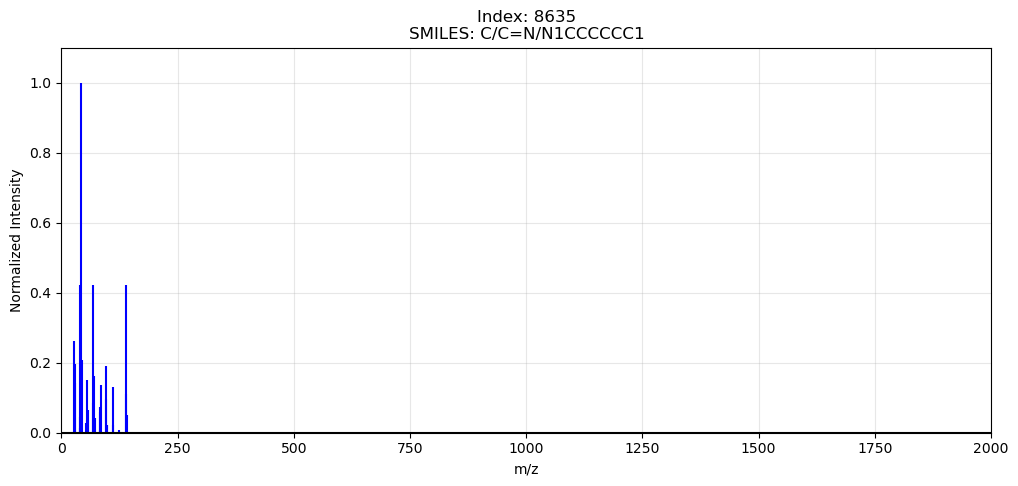

Displayed spectrum for Index 8635.
InChIKey: XLYFNXWSNVFHET-XNWCZRBMSA-N
Active Flags: ['num_N', 'has_C', 'has_N', 'has_H', 'has_single', 'has_double', 'has_ring', 'has_amine'] ... (Total 8)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ノートブック内でのプロット表示用
%matplotlib inline

# ファイルパス (作成したファイル名に合わせてください)
PARQUET_FILE = "processed/MoNA.parquet"

def inspect_parquet_data(file_path):
    print(f"Loading {file_path} ...")
    
    # 1. 読み込み
    try:
        df = pd.read_parquet(file_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    print(f"✅ Loaded successfully. Shape: {df.shape} (Rows, Columns)")
    
    # 2. データ型の確認 (特にspectrum列)
    print("\n--- 1. Data Type Check ---")
    if 'spectrum' in df.columns:
        sample_spec = df.iloc[0]['spectrum']
        print(f"Spectrum column type: {type(sample_spec)}")
        
        if isinstance(sample_spec, np.ndarray):
            print(f"Spectrum array shape: {sample_spec.shape}")
            print(f"Spectrum value range: Min={sample_spec.min():.4f}, Max={sample_spec.max():.4f}")
            if sample_spec.max() <= 1.0:
                print("✅ Normalization check: Passed (Max <= 1.0)")
            else:
                print("⚠️ Warning: Spectrum values exceed 1.0")
        else:
            print("❌ Error: Spectrum is not a numpy array (probably loaded as list or string?)")
    else:
        print("❌ Error: 'spectrum' column not found.")

    # 3. 欠損値の確認
    print("\n--- 2. Missing Value Check ---")
    null_counts = df.isnull().sum()
    if null_counts.sum() == 0:
        print("✅ No missing values found.")
    else:
        print("⚠️ Missing values detected:")
        print(null_counts[null_counts > 0])
    
    # 各カラム名を表示
    print("\nColumns in the DataFrame:")
    for col in df.columns:
        print(f"- {col}")

    # 4. フラグ情報の統計 (すべて0になっていないか確認)
    print("\n--- 3. Flag Statistics (Top 10 cols) ---")
    # 'num_' または 'has_' で始まる列を抽出
    flag_cols = [c for c in df.columns if c.startswith('num_') or c.startswith('has_')]
    
    if flag_cols:
        # 平均値 (=発生率) を表示 -> 総和へ変更
        stats = df[flag_cols].sum().sort_values(ascending=False)
        print("Flag prevalence (Sum):")
        for col, val in stats.items():
            print(f"{col}: {val}")
        
        # 全て0の列がないかチェック
        zero_cols = [c for c in flag_cols if df[c].sum() == 0]
        if zero_cols:
            print(f"\n⚠️ Note: The following columns are all zeros: {zero_cols}")
    else:
        print("No flag columns found.")

    # 5. スペクトルの可視化
    print("\n--- 4. Visual Inspection (Random Sample) ---")
    idx = random.randint(0, len(df) - 1)
    row = df.iloc[idx]
    
    smiles = row['smiles']
    spec = row['spectrum']
    
    # m/z軸の作成 (配列のインデックスそのもの)
    mz_axis = np.arange(len(spec))
    
    plt.figure(figsize=(12, 5))
    
    # ステムプロット (MSの表示に適しています)
    # マーカーを消して線だけにする ('markerfmt=" "')
    plt.stem(mz_axis, spec, markerfmt=" ", basefmt="k-", linefmt='b-')
    
    plt.title(f"Index: {idx}\nSMILES: {smiles}")
    plt.xlabel("m/z")
    plt.ylabel("Normalized Intensity")
    plt.xlim(0, len(spec)) # 全範囲表示
    plt.ylim(0, 1.1)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Displayed spectrum for Index {idx}.")
    print(f"InChIKey: {row.get('inchikey', 'N/A')}")
    # フラグの一部を表示
    active_flags = [c for c in flag_cols if row[c] > 0]
    print(f"Active Flags: {active_flags[:10]} ... (Total {len(active_flags)})")

# 実行
inspect_parquet_data(PARQUET_FILE)

```
Flag prevalence (Sum):
num_O: 20540
has_C: 9675
has_H: 9636
has_single: 9615
has_O: 7526
has_double: 6723
has_ring: 6689
num_N: 5555
has_aromatic: 4879
has_carbonyl: 4816
has_ether: 4009
has_N: 3295
has_alcohol: 2883
has_amine: 1593
num_F: 840
has_carboxylic: 767
has_amide: 372
has_triple: 246
has_F: 243
has_cyano: 151
```

Loading processed/MoNA.parquet ...
✅ Loaded successfully. Shape: (9680, 24) (Rows, Columns)

--- Atom Count Analysis (for max_atoms setting) ---
Calculating atom counts... (This might take a moment)
📊 90% Percentile of Total Atoms (with H): 54.0
📊 Max Heavy Atoms (without H): 96
📊 Max Total Atoms (with H)   : 266  <-- Use this for 'max_atoms' if including H

Example of the largest molecule (Index: 1):
SMILES: CC(=O)OCCC(C)CCCC(C)CCCC(C)CCCC(C)CCC(CCCC(C)CCCC(C)CCCC(C)CCOC(C)=O)CC(CCC(C)CCCC(C)CCCC(C)CCOC(C)=O)C(C)CCC(C)CCCC(C)CCCC(C)CCCC(C)CCOC(C)=O
Heavy Atoms: 96
Total Atoms: 266


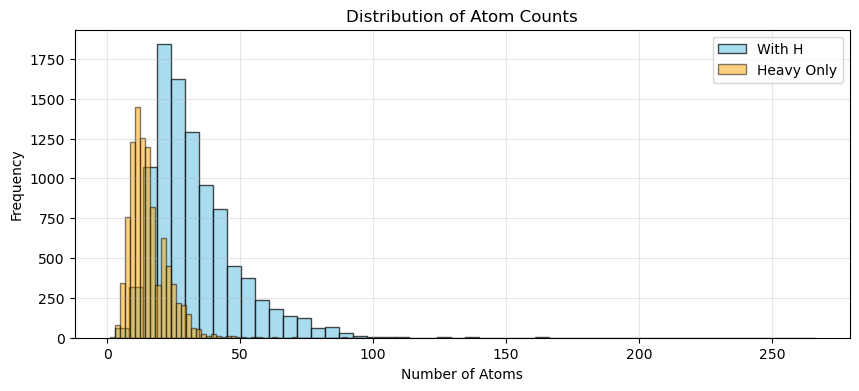

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from rdkit import Chem
from rdkit.Chem import AllChem

# ノートブック内でのプロット表示用
%matplotlib inline

# ファイルパス
PARQUET_FILE = "processed/MoNA.parquet"

def inspect_parquet_data(file_path):
    print(f"Loading {file_path} ...")
    
    # 1. 読み込み
    try:
        df = pd.read_parquet(file_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    print(f"✅ Loaded successfully. Shape: {df.shape} (Rows, Columns)")

    # ---------------------------------------------------------
    # 追加機能: 最大原子数の計算 (RDKit使用)
    # ---------------------------------------------------------
    print("\n--- Atom Count Analysis (for max_atoms setting) ---")
    
    if 'smiles' in df.columns:
        print("Calculating atom counts... (This might take a moment)")
        
        # 原子数を数える関数
        def count_atoms(smiles):
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                # 重原子数 (Heavy Atoms)
                n_heavy = mol.GetNumAtoms()
                
                # 水素込みの全原子数 (Total Atoms)
                # ※ 3D計算やパディング設定にはこちらが重要
                mol_h = Chem.AddHs(mol)
                n_total = mol_h.GetNumAtoms()
                return n_heavy, n_total
            return 0, 0

        # applyを使って一括計算 (タプルで返ってくるのでzipで分解)
        # ※データ量が多い場合は時間がかかるので注意
        counts = df['smiles'].apply(count_atoms)
        
        # 新しい列として一時的に追加（分析用）
        df['n_heavy_atoms'] = [x[0] for x in counts]
        df['n_total_atoms'] = [x[1] for x in counts]
        
        # 統計量の表示
        max_heavy = df['n_heavy_atoms'].max()
        max_total = df['n_total_atoms'].max()

        # df['n_total_atoms'] の90%タイルも表示
        percentile_90 = np.percentile(df['n_total_atoms'], 90)
        print(f"📊 90% Percentile of Total Atoms (with H): {percentile_90}")
        
        print(f"📊 Max Heavy Atoms (without H): {max_heavy}")
        print(f"📊 Max Total Atoms (with H)   : {max_total}  <-- Use this for 'max_atoms' if including H")
        
        # 最大分子の情報を表示
        id_max = df['n_total_atoms'].idxmax()
        print(f"\nExample of the largest molecule (Index: {id_max}):")
        print(f"SMILES: {df.loc[id_max, 'smiles']}")
        print(f"Heavy Atoms: {df.loc[id_max, 'n_heavy_atoms']}")
        print(f"Total Atoms: {df.loc[id_max, 'n_total_atoms']}")

        # 分布のヒストグラムを表示（設定値の目安にするため）
        plt.figure(figsize=(10, 4))
        plt.hist(df['n_total_atoms'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='With H')
        plt.hist(df['n_heavy_atoms'], bins=50, color='orange', edgecolor='black', alpha=0.5, label='Heavy Only')
        plt.title("Distribution of Atom Counts")
        plt.xlabel("Number of Atoms")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
    else:
        print("❌ Error: 'smiles' column not found. Cannot count atoms.")
    # ---------------------------------------------------------

# 実行
inspect_parquet_data(PARQUET_FILE)